# Exponential Atmosphere Comparisons¶

## Introduction
The change in density (and pressure) of an atmosphere can be simply modeled by using the "exponential atmospheres" model described below. The goal of this notebook is to explore the atmospheric parameters that affect the change in density as a function of altitude. As you explore this, keep in mind the affect of the density on satellite orbits.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

alt_max = 500 #maximum altitude in kilometers declared globally

## Part 1: Exponential Atmosphere
_This exercise follows lectures by Stan Solomn who is following 
Chamberlain & Hunten, Theory of Planetary Atmospheres_
Part 1 does not require a lot of interaction but lays out the approach we will take and sets up some functions that will be useful.  

The pressure decreases at higher altitudes with a pressure gradient given by:

>$ dP/dz = - g(z) \rho(z)$ where $\rho(z) $ is the atmosphereic density as a function of hegiht

Using the Ideal Gas Law:

>$P = nkT = \frac{\rho}{M_w}kT$  where $M_w$ is the molecular weight.  

Plugging into the pressure gradient reltionship and we get 

>$dP/dz = - P(z) M_w g(z)/kT = - P(z)/H$ where $ H= \frac{kT}{M_w g}$ 

$H$ is refered to as the "Scale Height". 

#### Scale Height Function
The following function calculates the scale height. 
- Execute that cell, 
- and then in the empty cell below it, call the function with some appropriate values at sea level.  
- (Use the average value of molecular weight of $N_2$ and $O_2$.) 
What is the typical scale hieght?  

In [2]:
def SH(T,mw,g): #returns the scale height in meters
    amu = 1.66e-27 # mass of a proton in Kilograms
    mass = mw*amu # find the actual mass in kilograms
    kb = 1.381e-23 # Boltzman Const. Joules per Kelvin
    h = kb*T/(mass*g)
    return(h)

### Reference Solution: An Exponential Atmosphere

The pressure as a function of altitude is given by this differential equation:
>$dP/dz = - P(z) M_w(z) g(z)/kT(z) = - P(z)/H(z),$ where $ H= \frac{kT}{M_w g}$ 

As an example, we can start by looking at the solution where $H(z)$ is a constant assuming a atmospheric temperature of 300 K, an average molecular weight (which means a constant composition) of 29 grams/mole (average, and a constant value for the Earth's gravitational field of $g_0=9.8 m/s^2$.

For this case can be solved analytically, but we will do it numerically to show the approach.  For simplicity and ease of understanding the code, we will use Euler's Method:

>$dP/dz \approx \frac{P(h+\Delta h) - P(h)}{\Delta h} = - P(h)/H(h)$

> $P(h+\Delta h) = P(h)*(1-\Delta h/H(h))$

The following function takes arrays of $T$, $M_w$, and $g$ that "can" vary with height. 

It should be noted that, considering the ideal gas law, the density and pressure scale with each other and so obey the same differential equation.
> $\rho(h+\Delta h) = \rho(h)*(1-\Delta h/H(h))$

In [3]:
def density_ref(T, mw, g): #integrate for atmospheric density using fixed parameters
    # initialize altitude
    alt = [0] 
    h = 0 
    dh=10 # height increments in meters
    i = 0

    # initialize density
    rho_0 = 1.2 # atmosphereic density at sea level in kg/m^3
    den = [rho_0]
    rho = rho_0
    
    #Integrate atmosphere over hieght
    while h<alt_max*1000: # increase hieght 1 meter at a time
        h += dh
        i+=1
        H_s = SH(T[i],mw[i],g[i]) #Find the new scale height at a given altitude
        rho -= rho*dh/H_s #increment the density down
        alt.append(h/1000);den.append(rho)
    return(alt,den)

#### Constant Parameter
The following functions set the $T$, $M_w$, and $g$ arrays to a value near the surface of the Earth.
> Of course this is computationally unneccassary but it sets up a structure that will be used later when these values are varied.

In [4]:
def Grav_const(): #Calculate the acceleration due to Gravity at the surface of the Earth
    GMe = 3.986e14 #Gravitational Constant * Mass of the Earth [m^3/s^2]
    R_e = 6.371e6 #Radius of the Earth in meters
    g_Re = GMe/(R_e)**2
    g = [g_Re] #create a list containing the value of g_Re
    h=0; dh=10
    while h<alt_max*1000: # increase hieght 1 meter at a time
        h += dh
        g.append(g_Re)
    return(g)

def mole_const(): #set the mw list to the average molecular mass
    mw = [29.0] #average molecular mass of atmosphere at Earth's surface
    h=0; dh=10
    while h<alt_max*1000: # increase hieght 1 meter at a time
        h += dh
        mw.append(29.0)
    return(mw)

def Temp_const(): # set the Temp array to the temperature at the surface of the Earth
    T = [300] #estimated temperature at surface of the Earth
    h=0; dh=10
    while h<alt_max*1000: # increase hieght 1 meter at a time
        h += dh
        T.append(300)
    return(T)


The next cell uses the functions above 

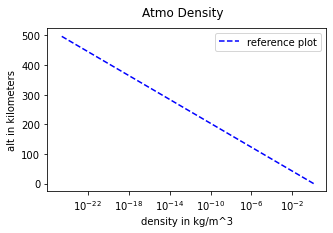

In [5]:
# Get the lists for the constants used to calcuate the scale height
g=Grav_const()
mw = mole_const()
T = Temp_const()

rho1= density_ref(T, mw, g)

#plot the density 
fig, ax = plt.subplots(1,figsize=(5,3))
plt.suptitle("Atmo Density")
ax.clear() # set up a plot
ax.plot(rho1[1],rho1[0],'b--',label = "reference plot")
plt.xscale('log') #set a semilog plot
ax.set_ylabel('alt in kilometers')
ax.set_xlabel('density in kg/m^3')
ax.legend() # turn on the legend
plt.show()


## Part 2: Solution with variable parameters
In part 2, we will start to include some variation in the parameters that go into the scale height: 
- gravitational acceleration, $g$.
- average molecular mass, $M_w$
- temperature, $T$

These all can vary with altitude and so change the scale height. We will see how this can affect the density of the atmosphere. While $g$ varies in a way that we can easily model, $M_w$ and $T$ can vary in a more complicated way that may require a complicated model atmospheric model. We will use some simple models for the variation of the parameters that mimic some of features that exist in the atmosphere/thermosphere. We will explore these one at at a time.  

### Part 2.a Gravitational Acceleration
The gravitaitonal acceleration is given by $g(r) = GM_e/r^2$.  This can also be refered to as a function of $g(h) = GM_e/(R_e+h)^2$. 

The function below is a copy of "Grav_const" used above.  Modify this function to return a list "g" which has the values of g(h) based on the function above. 

**How significant does the variation in gravitational acceleration affect the density profile?**

In [6]:
def Grav(): #Modify this function as described above
    GMe = 3.986e14 #Gravitational Constant * Mass of the Earth [m^3/s^2]
    R_e = 6.371e6 #Radius of the Earth in meters
    g_Re = GMe/(R_e)**2
    g = [g_Re] #create a list containing the value of g_Re at the surface of the Earth
    h=0; dh=10 #start altitude at 0 and increment by 10 meters
    while h<alt_max*1000: # increase hieght 1 meter at a time
        h += dh
        g_Re = GMe/(R_e+h)**2
        g.append(g_Re)
    return(g)

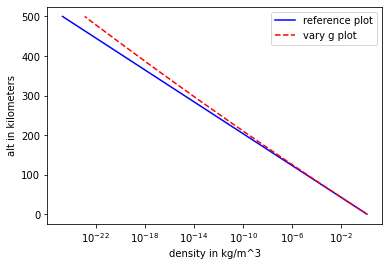

In [7]:
# Calculate the new density curve 
g = Grav() #non-constant acceleration
mw = mole_const()
T = Temp_const()

rho2 = density_ref(T, mw, g)

#plot the density 
fig, ax = plt.subplots(1,figsize=(6,4))
ax.clear() # set up a plot
ax.plot(rho1[1],rho1[0],'b',label = "reference plot") # plot the reference curve from part 1
ax.plot(rho2[1],rho2[0],'r--',label = "vary g plot") # plot the density profile using varying "g"
plt.xscale('log') #set a semilog plot
ax.set_ylabel('alt in kilometers')
ax.set_xlabel('density in kg/m^3')
ax.legend() # turn on the legend
plt.show()


### Part 2.b Varying Atmospheric Composition
The composition of the atmosphere changes with altitude so the average molecular weight will decrease with altitude. Below 100 km the atmosphere is fully mixed and priarily composed of $N_2$ and $O_2$.  We will model the average molecular weight here as about 29 AMU.  Above 100 km the percentage of atomic oxygen begins to increase until it is the dominant species. We will assume that at 500 km atomic oxygen is the dominant species and the atomic weight is 16.  We will further assume that between 100 km and 500 km the average molecular weight transitions smoothly from 29 amu to 16 amu. 

In the function below, try some of the following experiments
- constant values of molecular weight from 29 amu to 16 amu.  
- a function that varies smoothly from 29 to 16 amu with height
- a function that follows the variation described above. 

**How does the varying mass change the density profile?**

In [8]:
def mole(): #set the mw list to the average molecular mass
    mwbot = 29; mwtop = 16 #set the molecular mass at the bottom and top of the atmosphere
    mw = [mwbot] #initiate mw lists
    h=0; dh=10
    slope = (mwtop-mwbot)/(alt_max*1000)
    while h<alt_max*1000: # increase hieght 1 meter at a time
        h += dh
        mw_dum = mwbot + slope*h
        mw.append(mw_dum)
    return(mw)

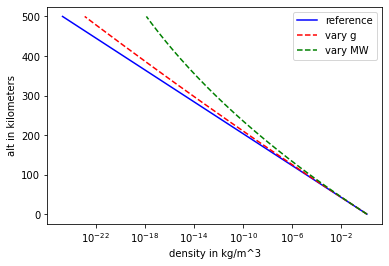

In [9]:
# Calculate the new density curve 
g = Grav() #non-constant acceleration
mw = mole() #varying molecular weight 
T = Temp_const() #Constant Temperature

rho3 = density_ref(T, mw, g)

#plot the density 
fig, ax = plt.subplots(1,figsize=(6,4))
ax.clear() # set up a plot

ax.plot(rho1[1],rho1[0],'b',label = "reference")
ax.plot(rho2[1],rho2[0],'r--',label = "vary g") 
ax.plot(rho3[1],rho3[0],'g--',label = "vary MW") 

plt.xscale('log') #set a semilog plot
ax.set_ylabel('alt in kilometers')
ax.set_xlabel('density in kg/m^3')
ax.legend() # turn on the legend
plt.show()


### Part 2.c Varying Atmospheric Temperature
The atmospheric/thermosphereic tempearture varies with altitude.  The bottom of the atmosphere is at about 300 degrees Kelvin while the top of the atmosphere can be between 600 and 1000 K.  

In the function below, try some of the following experiments that vary the temperature between the bottom and the top of the atmosphere.  
> Start by trying a linear variation between the bottom and top.

**How does the varying Temperature change the density profile?**

In [10]:
def Temp(): # set the Temp array to the temperature at the surface of the Earth
    Tbot = 300; Ttop = 700
    slope = (Ttop-Tbot)/(alt_max*1000)
    T = [300] #estimated temperature at surface of the Earth
    h=0; dh=10
    while h<alt_max*1000: # increase hieght 1 meter at a time
        h += dh
        Tdum = Tbot + slope*h
        T.append(Tdum)
    return(T)

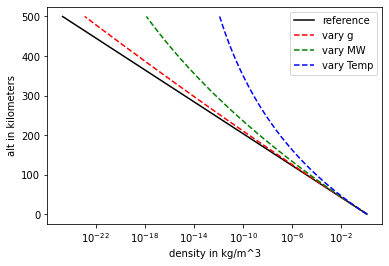

In [11]:
# Calculate the new density curve 
g = Grav() #non-constant acceleration
mw = mole() #varying molecular weight 
T = Temp() #varying Temperature

rho4 = density_ref(T, mw, g)

#plot the density 
fig, ax = plt.subplots(1,figsize=(6,4))
ax.clear() # set up a plot

ax.plot(rho1[1],rho1[0],'k',label = "reference")
ax.plot(rho2[1],rho2[0],'r--',label = "vary g") 
ax.plot(rho3[1],rho3[0],'g--',label = "vary MW") 
ax.plot(rho4[1],rho4[0],'b--',label = "vary Temp") 

plt.xscale('log') #set a semilog plot
ax.set_ylabel('alt in kilometers')
ax.set_xlabel('density in kg/m^3')
ax.legend() # turn on the legend
plt.show()
